In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [4]:
df=pd.read_csv('data\PreprocessedBankChurners.csv')
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,0,50,3,39,5,1,3,12691.0,777,11914.0,...,0,0,1,0,0,0,0,1,0,0
1,0,60,5,44,6,1,2,8256.0,864,7392.0,...,0,1,0,0,0,0,0,0,1,0
2,0,60,3,36,4,1,0,3418.0,0,3418.0,...,0,1,0,0,0,0,0,1,0,0
3,0,50,4,34,3,4,1,3313.0,2517,796.0,...,0,0,1,0,0,0,0,0,0,1
4,0,50,3,21,5,1,0,4716.0,0,4716.0,...,0,0,0,0,1,0,0,1,0,0


In [6]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_F', 'Gender_M', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Sing

In [5]:
X = df.iloc[:, df.columns != 'Attrition_Flag']
y = df['Attrition_Flag']
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
smote=SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

In [7]:
from collections import Counter
print ("Before SMOTE : ", Counter(y_train))
print ("After SMOTE : ", Counter(y_train_smote))

Before SMOTE :  Counter({0: 6387, 1: 1208})
After SMOTE :  Counter({0: 6387, 1: 6387})


In [8]:
gb_best_param = GradientBoostingClassifier(n_estimators = 1000, learning_rate=0.1, max_depth=4, random_state=42)
gb_best_param.fit(X_train_smote,y_train_smote)
y_pred=gb_best_param.predict(X_test)

In [9]:
print(confusion_matrix(y_test, y_pred))

[[2069   44]
 [  35  384]]


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2113
           1       0.90      0.92      0.91       419

    accuracy                           0.97      2532
   macro avg       0.94      0.95      0.94      2532
weighted avg       0.97      0.97      0.97      2532



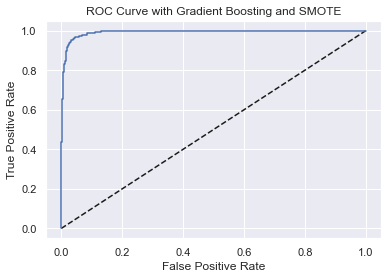

In [11]:
y_pred_prob = gb_best_param.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Gradient Boosting Case Study')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Gradient Boosting and SMOTE')
plt.show();

In [12]:
roc_auc_score(y_test, y_pred_prob)

0.9924289572337174

In [13]:
feature_importance = gb_best_param.feature_importances_

30


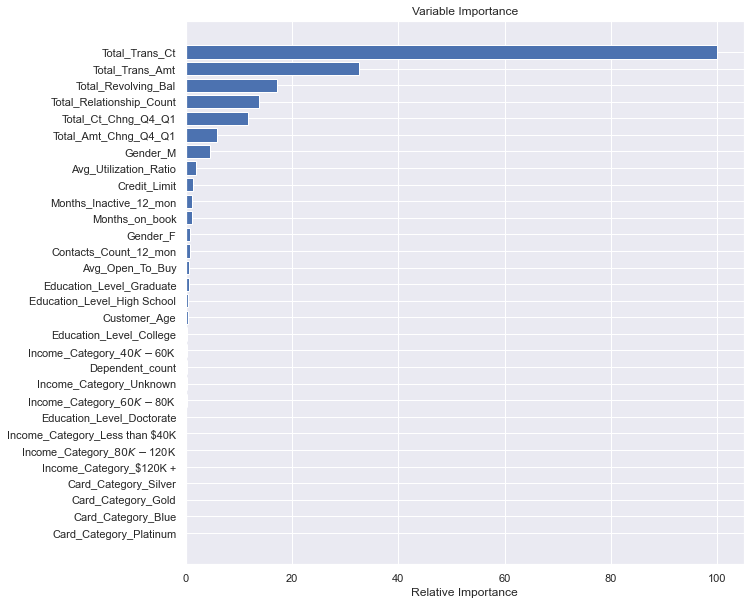

In [14]:
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()